In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

a

In [4]:
zipper = pd.read_csv('../data/Zip_Codes.csv')

In [5]:
roots = gpd.read_file('../data/bus_routes.geojson')
print(roots.crs)
roots.head( )

EPSG:4326


,agency_id,line_abbr,line_id,line_name,geometry
0,1,1,2010,100 OAKS,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
1,1,2,2017,BELMONT,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
2,1,3,2027,WEST END - WHITE BRIDGE,"MULTILINESTRING ((-86.80813 36.14708, -86.8083..."
3,1,4,2035,SHELBY,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
4,1,5,2042,WEST END - BELLEVUE,"MULTILINESTRING ((-86.80813 36.14708, -86.8083..."


In [6]:
water = gpd.read_file('../data/public_water.geojson')
print(water.crs)
water.head()

EPSG:4326


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,NaN,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)


In [7]:
type(roots)

geopandas.geodataframe.GeoDataFrame

In [8]:
type(water)

geopandas.geodataframe.GeoDataFrame

In [9]:
roots.shape

(48, 5)

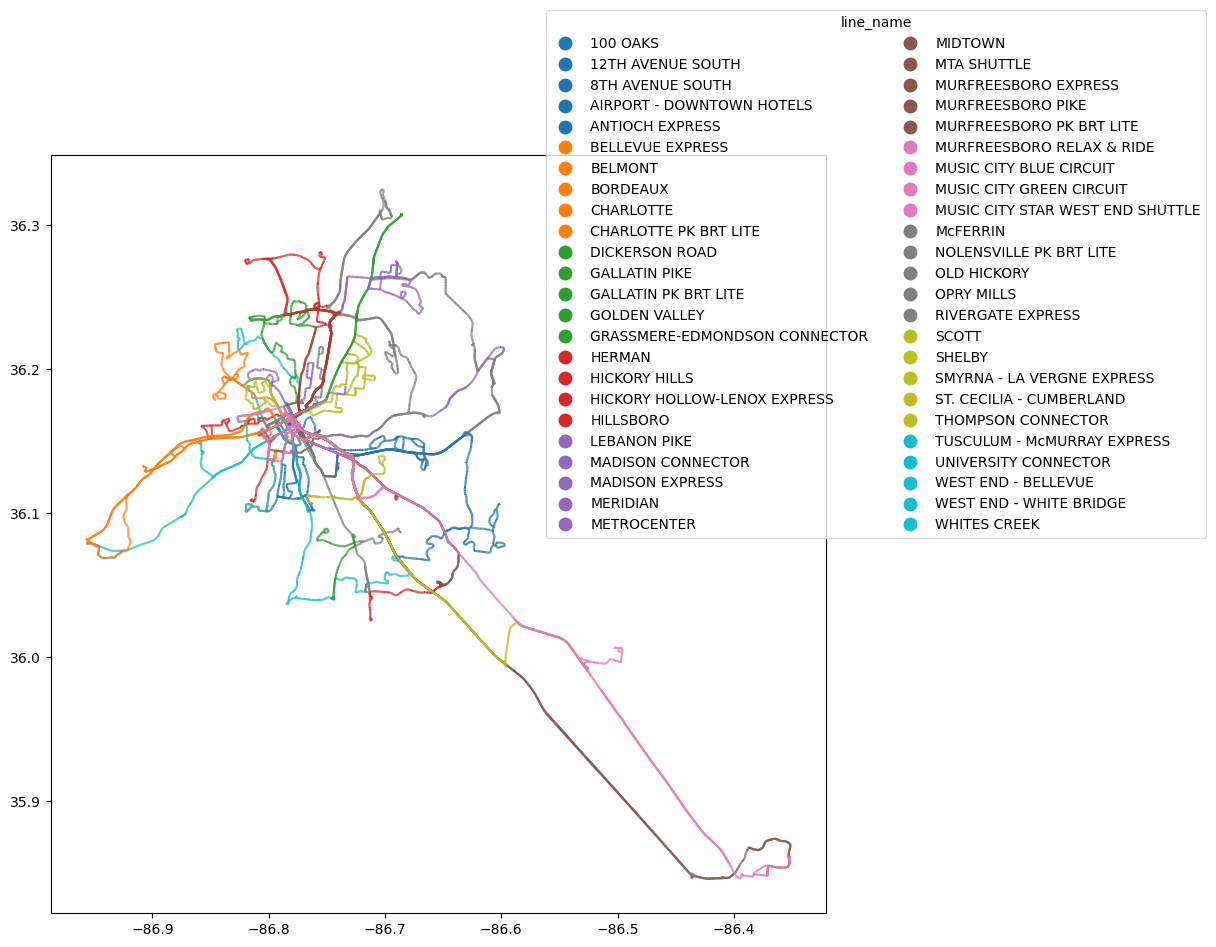

In [10]:
leg_kwds = {'title':'line_name', 'loc': 'upper right', 'bbox_to_anchor': (1.5, 1.2), 'ncol':2}

roots.plot(column = 'line_name', figsize=(10,10), legend = True, legend_kwds = leg_kwds)

plt.show()

In [12]:
ro_wa = gpd.GeoDataFrame(water,
                         crs = roots.crs,
                         geometry = water['geometry'])

<Axes: >

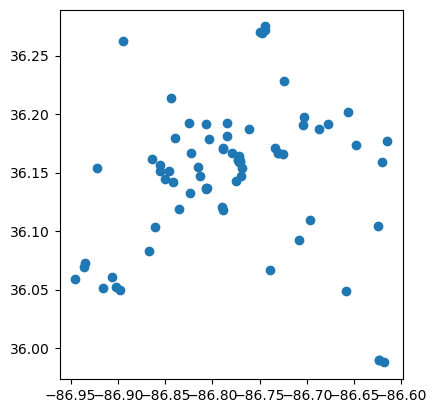

In [13]:
ro_wa.plot()

In [14]:
rowa = ro_wa[['name', 'geometry', 'lat', 'lon']]

In [15]:
rowa

,name,geometry,lat,lon
0,Beaman Water Fountain,POINT (-86.89425 36.26250),-86.89425346,36.26250456
1,Edwin Nature Center Water Fountain,POINT (-86.90623 36.06090),-86.90622747,36.06089915
2,Percy Warner Belle Meade Gates Water Fountain,POINT (-86.86728 36.08310),-86.86727566,36.08310102
3,West Park Water Fountain,POINT (-86.86379 36.16180),-86.86378994,36.16179583
4,Richland Park Water Fountain,POINT (-86.84589 36.15139),-86.84589094,36.15139384
...,...,...,...,...
68,Harpeth River Greenway,POINT (-86.94508 36.05899),-86.94508441,36.05899273
69,Harpeth River Greenway,POINT (-86.91617 36.05133),-86.91617134,36.05133033
70,River Landing,POINT (-86.77223 36.16412),-86.77223047,36.16412161
71,Ascend Amphiteater Water Fountain,POINT (-86.77121 36.16014),-86.77120998,36.16014227


In [16]:
roots = roots[['line_name', 'geometry']]

In [17]:
roots

,line_name,geometry
0,100 OAKS,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
1,BELMONT,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
2,WEST END - WHITE BRIDGE,"MULTILINESTRING ((-86.80813 36.14708, -86.8083..."
3,SHELBY,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
4,WEST END - BELLEVUE,"MULTILINESTRING ((-86.80813 36.14708, -86.8083..."
5,LEBANON PIKE,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
6,HILLSBORO,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
7,8TH AVENUE SOUTH,"MULTILINESTRING ((-86.77907 36.14695, -86.7790..."
8,METROCENTER,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."
9,CHARLOTTE,"MULTILINESTRING ((-86.78141 36.16676, -86.7816..."


In [18]:
zipper.dtypes

the_geom             object
OBJECTID              int64
Zip Code              int64
Post Office Name     object
created_date        float64
created_user        float64
last_edited_user    float64
GlobalID             object
last_edited_date    float64
dtype: object

In [19]:
zipper['the_geom'] = gpd.GeoSeries.from_wkt(zipper['the_geom'])

In [20]:
zippa = zipper[['the_geom','Zip Code']]

In [21]:
roots.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
rowa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
zippa = gpd.GeoDataFrame(zippa,
                         crs = roots.crs,
                         geometry = zippa['the_geom'])

In [24]:
zippa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

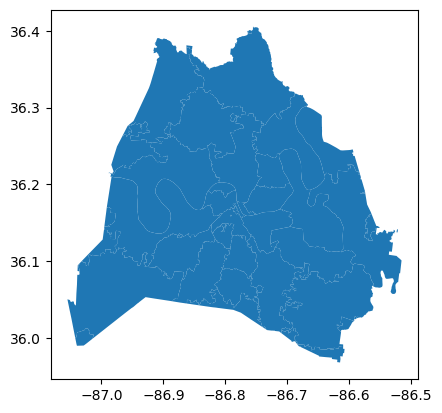

In [25]:
zippa.plot()

In [26]:
zip_water = gpd.sjoin(rowa, zippa, op = 'within')


c:\Users\patri\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [27]:
zip_roots= gpd.sjoin(roots, zippa, op = 'intersects')

c:\Users\patri\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [28]:
zip_water.head()

,name,geometry,lat,lon,index_right,the_geom,Zip Code
0,Beaman Water Fountain,POINT (-86.89425 36.26250),-86.89425346,36.26250456,1,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ...",37080
1,Edwin Nature Center Water Fountain,POINT (-86.90623 36.06090),-86.90622747,36.06089915,19,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ...",37221
2,Percy Warner Belle Meade Gates Water Fountain,POINT (-86.86728 36.08310),-86.86727566,36.08310102,19,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ...",37221
29,Edwin Warner Dog Park Water Fountain,POINT (-86.90162 36.05196),-86.90162012,36.05195562,19,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ...",37221
30,Edwin Warner Concession Water Fountain,POINT (-86.89817 36.04998),-86.8981744,36.04998346,19,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ...",37221


In [29]:
zip_roots

,line_name,geometry,index_right,the_geom,Zip Code
0,100 OAKS,"MULTILINESTRING ((-86.78141 36.16676, -86.7816...",52,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204
1,BELMONT,"MULTILINESTRING ((-86.78141 36.16676, -86.7816...",52,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204
7,8TH AVENUE SOUTH,"MULTILINESTRING ((-86.77907 36.14695, -86.7790...",52,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204
12,12TH AVENUE SOUTH,"MULTILINESTRING ((-86.78122 36.16648, -86.7811...",52,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204
16,UNIVERSITY CONNECTOR,"MULTILINESTRING ((-86.81833 36.15437, -86.8183...",52,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204
...,...,...,...,...,...
31,GOLDEN VALLEY,"MULTILINESTRING ((-86.78141 36.16676, -86.7816...",8,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ...",37189
33,HICKORY HILLS,"MULTILINESTRING ((-86.78141 36.16676, -86.7816...",8,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ...",37189
44,MURFREESBORO EXPRESS,"MULTILINESTRING ((-86.78141 36.16676, -86.7816...",3,"MULTIPOLYGON (((-86.58870 36.02671, -86.58836 ...",37086
45,SMYRNA - LA VERGNE EXPRESS,"MULTILINESTRING ((-86.78141 36.16676, -86.7816...",3,"MULTIPOLYGON (((-86.58870 36.02671, -86.58836 ...",37086


c:\Users\patri\anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\patri\anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


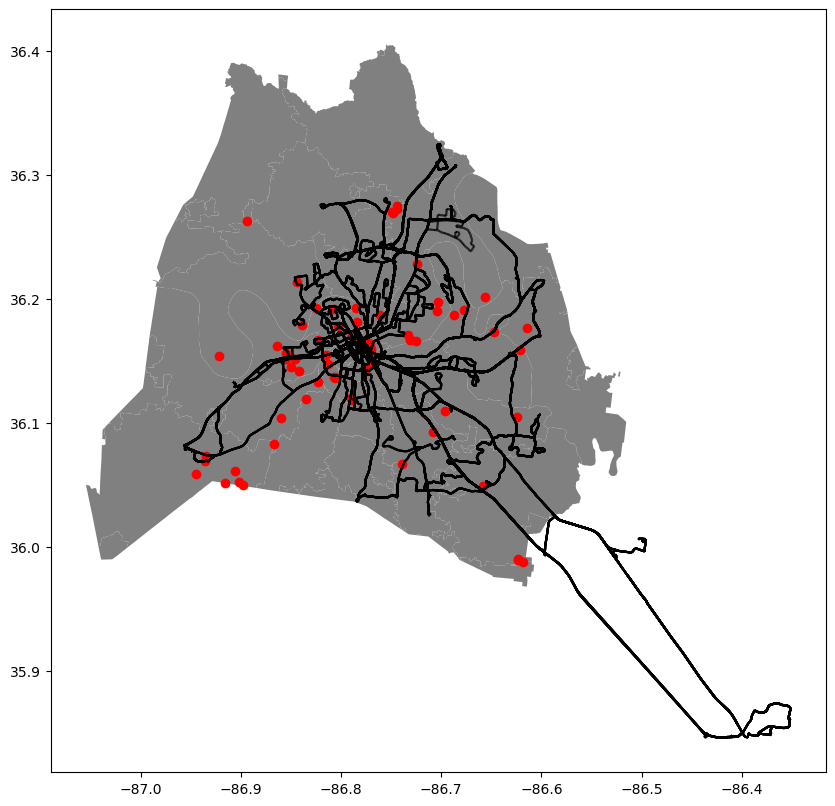

In [30]:
ax = zippa.plot(figsize = (10,10), color = 'gray')
zip_water.plot(ax=ax, column = 'name', color = 'red')
zip_roots.plot(ax=ax, column = 'line_name', color = 'black')
plt.show()

In [31]:
weeg = pd.read_csv('../data/we_go.csv')

In [66]:
weeg.head()

,Stop ID,Stop Name,Route Name,Mapped Location,lat,lon,geometry
4,4133,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
5,4083,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
6,5066,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)
7,94,17TH AVE S & DOROTHY PL SB,BELMONT,"(36.137623, -86.795609)",36.137623,-86.795609,POINT (-86.795609 36.137623)
8,3219,COCKRILL ST & 14TH AVE N,ST. CECILIA - CUMBERLAND,"(36.175944, -86.804242)",36.175944,-86.804242,POINT (-86.804242 36.175944)


In [36]:
weeg = weeg[['Stop ID', 'Stop Name', 'Route Name', 'Mapped Location']].dropna()

weeg_temp = weeg[['Mapped Location']]
weeg_temp = weeg_temp['Mapped Location'].str.split(',', expand = True)
weeg_temp = weeg_temp.rename(columns = {0:'lat', 1:'lon'})
w_lat = weeg_temp['lat'].str[1:]
w_lon = weeg_temp['lon'].str[:-1]

weeg['lat'] = w_lat
weeg['lon'] = w_lon



In [38]:
weeg['geometry'] = weeg.apply(lambda x: Point((x.lon, x.lat)), axis = 1)

In [39]:
weegeo = gpd.GeoDataFrame(weeg,
                          crs = zippa.crs,
                          geometry = weeg['geometry'])

In [33]:
center = zippa.geometry.centroid[35]

C:\Users\patri\AppData\Local\Temp\ipykernel_25532\1066597901.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zippa.geometry.centroid[35]


In [34]:
area_center = [center.y, center.x]

In [54]:
map1 = folium.Map(location = area_center, zoom_start = 11)

# folium.GeoJson(zippa).add_to(map1)
folium.GeoJson(roots).add_to(map1)

for row_index, row_values in zip_water.iterrows():
    loc = [row_values['lon'], row_values['lat']]
    pop = str(row_values['name'])
    icon=folium.Icon(color = 'gray', icon = 'droplet', prefix = 'fa')

    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(map1)

# for row_index, row_values in weegeo.iterrows():
#     loc2 = [row_values['lat'], row_values['lon']]
#     pop2 = str(row_values['Stop Name'])
#     icon2 = folium.Icon(color = 'Red', icon = 'bus', prefix = 'fa')

#     marker2 = folium.Marker(
#         location = loc2, popup = pop2, icon = icon2)
    
#     marker2.add_to(map1)

map1.save('../maps/maps1.html')

map1